Sample Data (X and y):

[[-0.99910178 -0.66386   ]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 [-2.95744095  2.03364529]
 [ 1.14116527  1.05944863]]

[1 1 1 1 1]
Cluster Centers: [[-0.39969465  0.08849135]
 [ 0.93946254  0.9841696 ]
 [ 0.67314687 -1.08585879]
 [-1.49413123 -2.42890634]
 [-1.93132629  2.63919287]
 [ 2.01172112  2.07044123]
 [ 1.94396977 -1.08594355]
 [-0.92663271 -0.95775957]
 [-2.16432483  0.73648514]
 [-0.61789871  1.3120953 ]]
Standard Deviation: 0.5845071632007534
Model Accuracy: 88.0


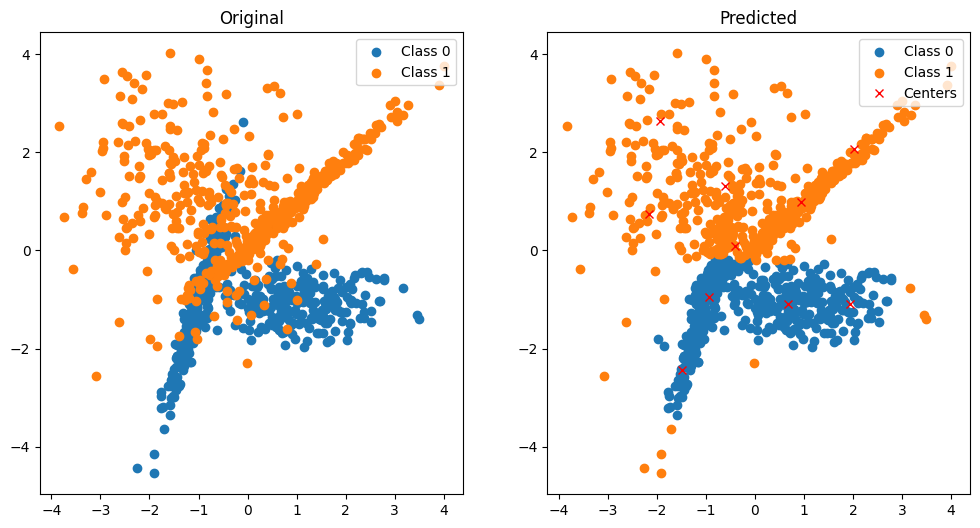

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from scipy.spatial.distance import cdist 
from sklearn.linear_model import LogisticRegression 

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=2, n_classes=2, 
    n_clusters_per_class=2, random_state=42, n_redundant=0
)
print("Sample Data (X and y):\n")
print(X[:5], y[:5], sep="\n\n")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters for RBF network
num_neurons = 10
kmeans = KMeans(n_clusters=num_neurons, random_state=42, n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

print("Cluster Centers:", centers)

# Calculate standard deviation based on cluster centers
std_dev = np.mean(cdist(centers, centers, 'euclidean')) / np.sqrt(2 * num_neurons)
print("Standard Deviation:", std_dev)

# RBF activation function
def rbf_activation(X, centers, std_dev):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * std_dev**2))

# Apply RBF activation to training and testing data
rbf_train = rbf_activation(X_train, centers, std_dev)
rbf_test = rbf_activation(X_test, centers, std_dev)

# Add bias term to RBF-activated data
rbf_train = np.hstack([rbf_train, np.ones((rbf_train.shape[0], 1))])
rbf_test = np.hstack([rbf_test, np.ones((rbf_test.shape[0], 1))])

# Train logistic regression on RBF-transformed data
clf = LogisticRegression()
clf.fit(rbf_train, y_train)
y_pred = clf.predict(rbf_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Model Accuracy:", accuracy * 100)

# Visualization function
def plot_result(X, y, centers=None):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1")
    if centers is not None:
        plt.plot(centers[:, 0], centers[:, 1], 'rx', label="Centers")
    plt.legend(loc="upper right")

# Plot original and predicted results
rbf_x = rbf_activation(X, centers=centers, std_dev=std_dev)
activated_x = np.hstack([rbf_x, np.ones((rbf_x.shape[0], 1))])

plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(121)
plt.title("Original")
plot_result(X, y)

# Plot predicted data
plt.subplot(122)
plt.title("Predicted")
plot_result(X, clf.predict(activated_x), centers=centers)

plt.show()
